# **Sabancı University CS412 Project - Spring 2023**

---

#### ***CNN Model***

Can Ceylan, *29010*

Barış Ulaş Çukur, *29461*

Alper Kaan Odabaşoğlu, *28147*

Safa Abdullah Söğütlügil, *29214* 
   
Pelinsu Saraç, *28820*

# Data Labels

0 -> Airplane
1 -> Automobile
2 -> bird
3 -> cat
4 -> deer
5 ->dog
6-> frog 
7-> horse
8 -> ship
9 -> truck

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import the necessary libraries

import tarfile
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from numpy import random
from PIL import Image

import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.layers import Dropout
from keras.regularizers import l2
from keras.regularizers import l1
np.random.seed(5)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img,save_img
import cv2
import os

from keras.utils import to_categorical

%matplotlib inline

In [ ]:
import tarfile

# Open the tar.gz file
with tarfile.open('/content/drive/My Drive/Data/CS412 Project/cifar-10-python.tar.gz', 'r:gz') as tar:
    # Extract all files
    tar.extractall()

### Train-Test Batches

readme.html
test_batch
batches.meta
data_batch_4
data_batch_1
data_batch_5
data_batch_2
data_batch_3
(50000, 3072) (50000,)
(50000, 32, 32, 3)


(-0.5, 31.5, 31.5, -0.5)

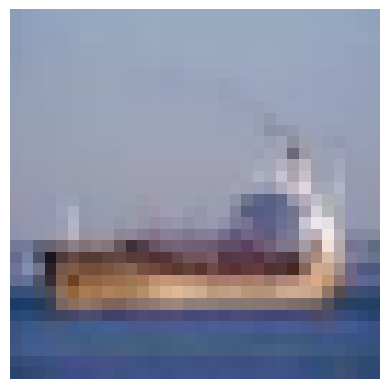

In [ ]:
train_images_batch = []
train_labels_batch = []

test_data = None
test_labels = None

label_names = []

# Iterate over the extracted files
for filename in os.listdir('cifar-10-batches-py'):
    print(filename)
    if filename.startswith('data_batch'):
        # Read the binary file
      with open(os.path.join('cifar-10-batches-py', filename), 'rb') as file:
          batch_data = pickle.load(file, encoding='bytes')
      
      # Extract the image data and labels
      images = batch_data[b'data']
      labels = batch_data[b'labels']
      
      ## Convert the data into a DataFrame
      # batch_df = pd.DataFrame(images)
      # batch_df['label'] = labels
      
      train_images_batch.append(images)
      train_labels_batch.append(labels)
    elif filename.startswith('test_batch'):
      with open(os.path.join('cifar-10-batches-py', filename), 'rb') as file:
            test_data = pickle.load(file, encoding='bytes')
      
      # Extract the image data and labels
      test_images = test_data[b'data']
      test_labels = test_data[b'labels']

      # test_df = pd.DataFrame(images)
      # test_df['label'] = labels

    elif filename == 'batches.meta':
      with open(os.path.join('cifar-10-batches-py', 'batches.meta'), 'rb') as file:
        meta_data = pickle.load(file, encoding='bytes')

      # Extract the label names
      label_names = meta_data[b'label_names']
      label_names = [label.decode('utf-8') for label in label_names]

train_images = np.concatenate(train_images_batch)
train_labels = np.concatenate(train_labels_batch)
print(train_images.shape, train_labels.shape)

train_images = train_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
print(train_images.shape)

test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)


plt.imshow(train_images[123])
plt.axis('off')

In [ ]:
def normalize_data(train, test):
  train = train / 255.0
  test = test / 255.0
  return train, test

train_images, test_images = normalize_data(train_images, test_images)

In [ ]:
val_images = train_images[40000:]
train_images = train_images[:40000]

val_labels = train_labels[40000:]
train_labels = train_labels[:40000]

In [ ]:
print(len(train_images), len(val_images))
print(len(train_labels), len(val_labels))
print(train_labels.shape)

40000 10000
40000 10000
(40000,)


In [ ]:
val_labels = to_categorical(val_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
image_size = 32
batch_size = 16

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = train_datagen.flow(
    train_images,
    y = train_labels,
    batch_size = batch_size,
    seed = 99
)

val_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
val_generator = val_datagen.flow(
    val_images,
    y = val_labels,
    batch_size = batch_size,
    seed = 99,
)


# Train CNN

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization

In [ ]:

def cifar_model():

  model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax'),
  ])

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

  model.compile(optimizer=opt,
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


In [ ]:
import pickle
from google.colab import files

def train_model():
  model = cifar_model()
  history = model.fit(train_generator, batch_size=64,steps_per_epoch=(train_images.shape[0]/64), epochs=500, validation_data=val_generator)

  return model, history

model, history = train_model()

with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

files.download('model.pkl')

Epoch 1/500
625/625 [==============================] - 23s 31ms/step - loss: 2.1836 - accuracy: 0.2535 - val_loss: 1.8537 - val_accuracy: 0.3420
Epoch 2/500
625/625 [==============================] - 20s 32ms/step - loss: 1.8082 - accuracy: 0.3341 - val_loss: 1.5365 - val_accuracy: 0.4275
Epoch 3/500
625/625 [==============================] - 18s 29ms/step - loss: 1.6510 - accuracy: 0.3948 - val_loss: 1.5136 - val_accuracy: 0.4297
Epoch 4/500
625/625 [==============================] - 18s 29ms/step - loss: 1.5691 - accuracy: 0.4236 - val_loss: 1.4639 - val_accuracy: 0.4608
Epoch 5/500
625/625 [==============================] - 19s 30ms/step - loss: 1.4993 - accuracy: 0.4505 - val_loss: 1.3749 - val_accuracy: 0.5060
Epoch 6/500
625/625 [==============================] - 20s 33ms/step - loss: 1.4329 - accuracy: 0.4821 - val_loss: 1.2441 - val_accuracy: 0.5432
Epoch 7/500
625/625 [==============================] - 18s 29ms/step - loss: 1.4005 - accuracy: 0.5023 - val_loss: 1.3134 - val_ac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

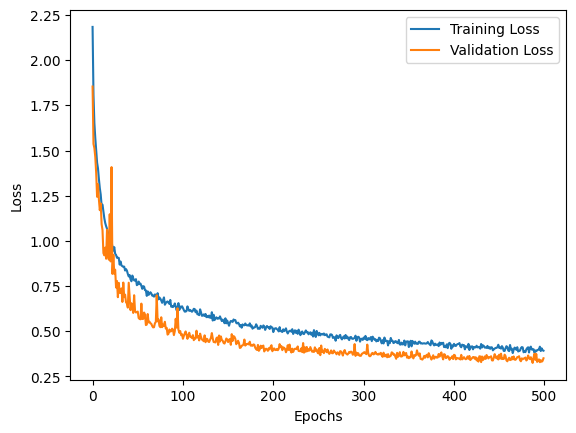

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test

In [ ]:
test_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_generator = test_datagen.flow(
    test_images,
    y = test_labels,
    batch_size = batch_size,
    seed = 99,
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

625/625 [==============================] - 8s 12ms/step - loss: 0.3741 - accuracy: 0.8738
Test Loss: 0.37408173084259033
Test Accuracy: 0.8737999796867371


# Convert To HTML

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html Data_Preprocess.ipynb